# Example of an unbinned maximum likelihood fit with iminuit

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit

In [11]:
# x = np.loadtxt("data/data_ml_fit.txt")
x = np.loadtxt("https://www.physi.uni-heidelberg.de/~reygers/lectures/2020/smipp/data_ml_fit.txt")

In [12]:
def f(x, a, b):
    """normalized fit function"""
    xmin = -0.95
    xmax = 0.95
    return (6 * (1 + a * x + b * x * x)) / \
            ((xmax - xmin) * (3 * a * (xmax + xmin) + \
            2 * (3 + b * (xmax * xmax + xmax * xmin + xmin * xmin))))

In [13]:
def negative_log_likelihood(a, b):
    p = np.log(f(x, a, b))
    return -np.sum(p)

In [14]:
m = Minuit(negative_log_likelihood, 
           a=1, b=1, error_a=0.01, error_b=0.01, errordef=Minuit.LIKELIHOOD)

In [15]:
m.migrad()

------------------------------------------------------------------
| FCN = 606.5                   |      Ncalls=50 (50 total)      |
| EDM = 2.23e-08 (Goal: 0.0001) |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | a    |   0.53    |   0.08    |            |            |         |         |       |
| 1 | b    |   0.51    |   0.16    |            |            |         |         |       |
------------------------------------------------------------------------------------------

In [16]:
# covariance matrix
m.matrix()

-------------------
|   |     a     b |
-------------------
| a | 0.006 0.006 |
| b | 0.006 0.026 |
-------------------

In [17]:
# correlation matrix
m.matrix(correlation=True)

-------------------
|   |     a     b |
-------------------
| a | 1.000 0.476 |
| b | 0.476 1.000 |
-------------------

In [18]:
# function with fitted parameters
xf = np.linspace(-1, 1., 1000)
a_fit = m.args[0]
b_fit = m.args[1]
yf = f(xf, a_fit, b_fit)

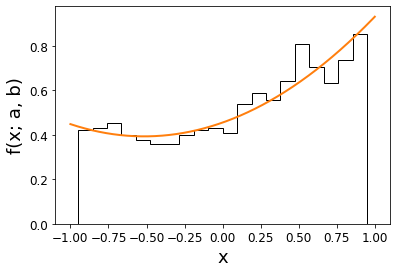

In [19]:
plt.hist(x, bins=20, density=True, ec="black", histtype='step');
plt.plot(xf, yf, linewidth=2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("x", fontsize=18)
plt.ylabel("f(x; a, b)", fontsize=18);
plt.savefig("ml_fit_example.pdf")

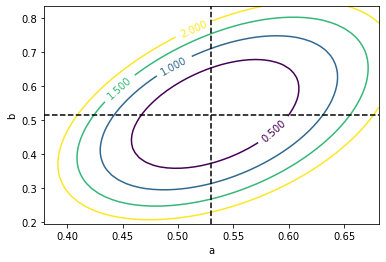

In [20]:
m.draw_contour('a','b');